In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Image recovery

In [8]:
def omp(A, y, tol=0.001, max_iters=None):
    # Initialize
    residual = y
    index_set = []
    x = np.zeros(A.shape[1])
    n_nonzero_coefs = 0

    # If max_iters is not set, default to the number of columns in A
    if max_iters is None:
        max_iters = A.shape[1]

    for _ in range(max_iters):
        # find the most correlated column
        idx = np.argmax(np.abs(A.T @ residual))
        
        # if we already have this idx in our set, we break out (no new information)
        if idx in index_set:
            break
        
        index_set.append(idx)
        
        # update the solution
        A_selected = A[:, index_set]
        x_temp, _, _, _ = np.linalg.lstsq(A_selected, y, rcond=None)  # least square solution
        
        # update the residual
        residual = y - A_selected @ x_temp
        
        # Update the number of nonzero coefficients
        n_nonzero_coefs = len(index_set)
        
        print(f'Iteration {n_nonzero_coefs}: {np.linalg.norm(residual)}')

        # if the residual is small enough or if we have selected enough nonzeros, break
        if np.linalg.norm(residual) < tol or n_nonzero_coefs >= max_iters:
            break
    
    # set the nonzero coefficients in the signal estimate
    for i, idx in enumerate(index_set):
        x[idx] = x_temp[i]
    
    return x

In [9]:
import scipy.io
data = scipy.io.loadmat('./data/data.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'A1', 'A2', 'A3', 'y1', 'y2', 'y3'])


In [10]:
A1, A2, A3 = data['A1'], data['A2'], data['A3']
y1, y2, y3 = data['y1'], data['y2'], data['y3']
print(A1.shape, A2.shape, A3.shape, y1.shape, y2.shape, y3.shape)

(960, 14400) (1440, 14400) (2880, 14400) (960, 1) (1440, 1) (2880, 1)


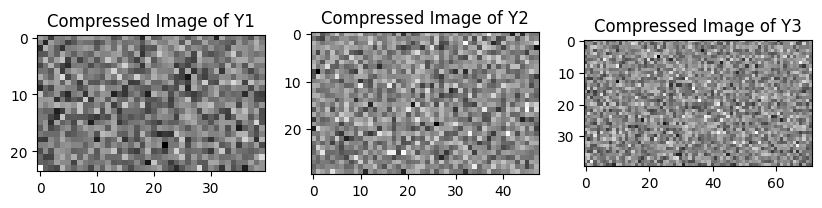

In [11]:
# reshape y1, y2, y3 about 16:9
Y_img1 = y1.reshape(40, 24)
Y_img2 = y2.reshape(48, 30)
Y_img3 = y3.reshape(72, 40)

# rotate the images
Y_img1 = np.rot90(Y_img1, 3)
Y_img2 = np.rot90(Y_img2, 3)
Y_img3 = np.rot90(Y_img3, 3)

# flip the images
Y_img1 = np.flipud(Y_img1)
Y_img2 = np.flipud(Y_img2)
Y_img3 = np.flipud(Y_img3)

# plot the images
plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(Y_img1, cmap='gray')
plt.title('Compressed Image of Y1')
plt.subplot(132)
plt.imshow(Y_img2, cmap='gray')
plt.title('Compressed Image of Y2')
plt.subplot(133)
plt.imshow(Y_img3, cmap='gray')
plt.title('Compressed Image of Y3')
plt.show()

In [12]:
# decode the signal using OMP
print('Starting recovery of signal 1')
X_hat1 = omp(A1, y1)
print('Starting recovery of signal 2')
X_hat2 = omp(A2, y2)
print('Starting recovery of signal 3')
X_hat3 = omp(A3, y3)

Starting recovery of signal 1
Iteration 1: 2307.2517700035582
Iteration 2: 2280.1358834664197
Iteration 3: 2253.562037592498
Iteration 4: 2226.938112151364
Iteration 5: 2202.9173103866715
Iteration 6: 2181.350460412743
Iteration 7: 2159.8732560390317
Iteration 8: 2139.98776575334
Iteration 9: 2119.541558207567
Iteration 10: 2099.2560120397998
Iteration 11: 2081.5018981381622
Iteration 12: 2064.4470117365217
Iteration 13: 2045.780642368833
Iteration 14: 2026.5259604492353
Iteration 15: 2006.0963431606622
Iteration 16: 1989.3433115377843
Iteration 17: 1969.5348420489502
Iteration 18: 1952.7281617778774
Iteration 19: 1937.6776342849391
Iteration 20: 1921.484357235539
Iteration 21: 1906.1827791880426
Iteration 22: 1890.7391323855245
Iteration 23: 1876.8850984771996
Iteration 24: 1861.7800372438753
Iteration 25: 1846.3711323840173
Iteration 26: 1831.8295013589513
Iteration 27: 1817.2327821128665
Iteration 28: 1803.111222532539
Iteration 29: 1790.1454516280396
Iteration 30: 1776.334055330078

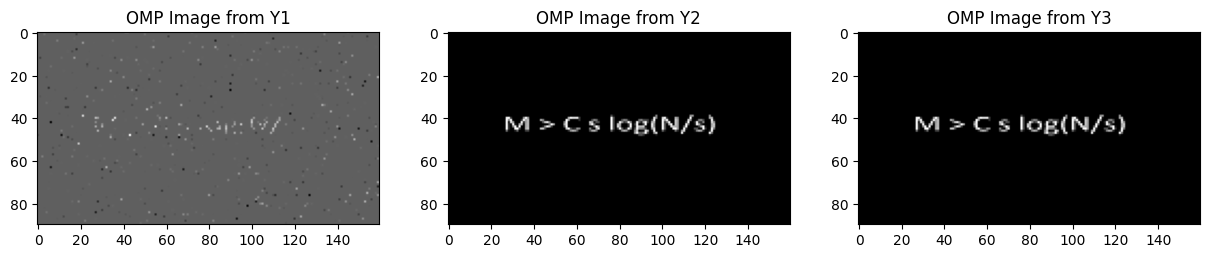

In [13]:
# reshape the decoded signals into images
X_img1 = X_hat1.reshape(160, 90)
X_img2 = X_hat2.reshape(160, 90)
X_img3 = X_hat3.reshape(160, 90)

# rotate the images
X_img1 = np.rot90(X_img1, 3)
X_img2 = np.rot90(X_img2, 3)
X_img3 = np.rot90(X_img3, 3)

# flip the images
X_img1 = np.fliplr(X_img1)
X_img2 = np.fliplr(X_img2)
X_img3 = np.fliplr(X_img3)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(X_img1, cmap='gray')
axs[0].set_title('OMP Image from Y1')
axs[1].imshow(X_img2, cmap='gray')
axs[1].set_title('OMP Image from Y2')
axs[2].imshow(X_img3, cmap='gray')
axs[2].set_title('OMP Image from Y3')
plt.show()

In [14]:
# decode the signal using least squares
X_hat_ls1 = np.linalg.pinv(A1) @ y1
X_hat_ls2 = np.linalg.pinv(A2) @ y2
X_hat_ls3 = np.linalg.pinv(A3) @ y3

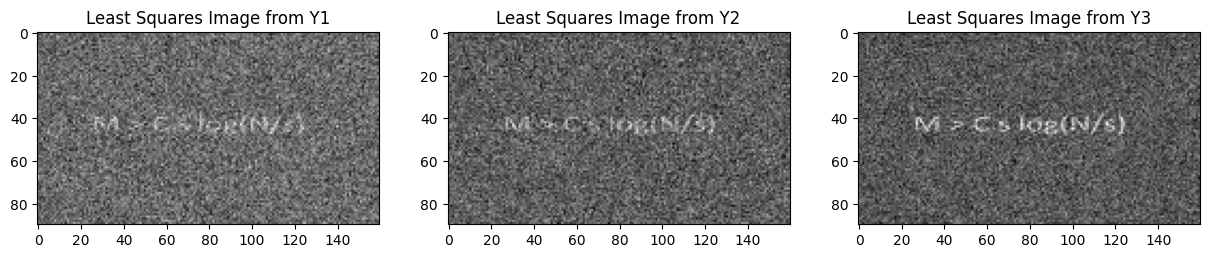

In [15]:
# reshape the decoded signals into images
X_img_ls1 = X_hat_ls1.reshape(160, 90)
X_img_ls2 = X_hat_ls2.reshape(160, 90)
X_img_ls3 = X_hat_ls3.reshape(160, 90)

# rotate the images
X_img_ls1 = np.rot90(X_img_ls1, 3)
X_img_ls2 = np.rot90(X_img_ls2, 3)
X_img_ls3 = np.rot90(X_img_ls3, 3)

# flip the images
X_img_ls1 = np.fliplr(X_img_ls1)
X_img_ls2 = np.fliplr(X_img_ls2)
X_img_ls3 = np.fliplr(X_img_ls3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(X_img_ls1, cmap='gray')
axs[0].set_title('Least Squares Image from Y1')
axs[1].imshow(X_img_ls2, cmap='gray')
axs[1].set_title('Least Squares Image from Y2')
axs[2].imshow(X_img_ls3, cmap='gray')
axs[2].set_title('Least Squares Image from Y3')
plt.show()